<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1h/blob/main/BE_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab1h Beats experiment

In [46]:
!pip install uncertainties

In [47]:
from uncertainties import ufloat
from uncertainties.umath import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit, Bounds



In [48]:
def get_freq1(t, x):

  def sinusoid(t, omega, phi):
    return np.cos(omega * t + phi)

  initials = [7, 0]
  bounds = ([5, -np.pi],
            [10, np.pi])
  popt, pcov = curve_fit(sinusoid, t, x, p0=initials, bounds=bounds)
  errs = np.sqrt(np.diag(pcov))
  om1n,  _ = popt
  om1_err, _  = errs
  omega1 = ufloat(om1n, om1_err)
  return omega1






## Expected frequency

$$
\omega_0 = \sqrt\frac{k_1+k_2}{m}
$$



In [49]:
dx = ufloat(97.95e-3, 0.01e-3)
dm1 = ufloat(32.6e-3, 0.1e-3) # g
dm2 = ufloat(65.6e-3, 0.1e-3) # g
g = 9.7939
k1 = dm1 * g / dx
k2 = dm2 * g / dx
print(f'k1 = {k1}, k2 = {k2}')
m = ufloat(206.1e-3, .1e-3)
m_strings = 0* ufloat(28e-3, .1e-3)
omega0 = sqrt((k1 + k2) / (m +  m_strings/6))
print(f'Expected omega0: {omega0} rad/s')


k1 = 3.260+/-0.010, k2 = 6.559+/-0.010
Expected omega0: 6.902+/-0.005 rad/s


## Measurements

In [50]:
def get_freq2(t, a, b):

  def beats(t, omega1, omega2,  A1, A2, phi1, phi2):
    return A1*np.sin(omega1*t+phi1) +  A2*np.sin(omega2*t+phi2)

  omega1 = omega0.n
  if (a@b) > 0: # in phase, omega1 below onega0
    omega2 = omega1 - 1
  else:
    omega2 = omega1 + 1
  initials =[omega1, omega2, 8.5, 9.3,     0.0,     0]
  bounds = ([5.00, 5.00, 0.0, 0.0,    -np.pi, -np.pi],
            [9.00, 9.00, 20,  20,     np.pi, np.pi])

  popt, pcov = curve_fit(beats, t, b, p0=initials, bounds=bounds)
  errs = np.sqrt(np.diag(pcov))
  om1n, om2n, A1, A2, _, _ = popt
  om1_err, om2_err, A1_err, A2_err, _, _  = errs
  omega1 = ufloat(om1n, om1_err)
  omega2 = ufloat(om2n, om2_err)
  A1 = ufloat(A1, A1_err)
  A2 = ufloat(A2, A2_err)
  plt.plot(t, b, '.')
  plt.plot(t, beats(t, *popt))
  return omega1, omega2, A1, A2


dgbd1.txt omega1 = 6.769+/-0.015 rad/s
dgbd1.txt omega1 = 6.98881+/-0.00026 rad/s, omega2 = 7.84984+/-0.00029 rad/s


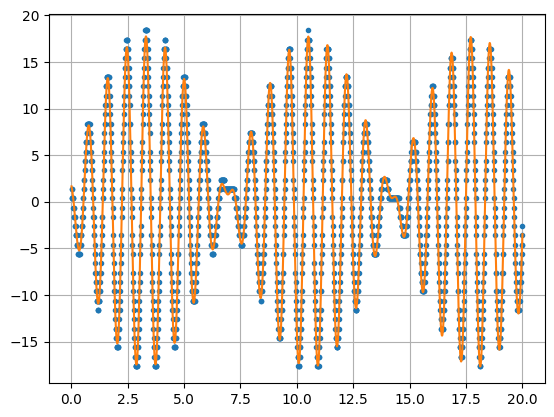

In [51]:
filename = 'dgbd1.txt'

t, a, b = np.genfromtxt(filename, delimiter='\t', usecols=[1,2, 3], unpack=True)
a -= a.mean()
#a /= np.max(a)
b -= b.mean()
#b /= np.max(b)

om1  = get_freq1(t, a)

print(f'{filename} omega1 = {om1} rad/s')

om1, om2, A1, A2 = get_freq2(t, a, b)
print(f'{filename} omega1 = {om1} rad/s, omega2 = {om2} rad/s')

plt.grid()
plt.show()

In [52]:
def get_freq3(t, b):

  def resonanse(t, omega, A, phi, t0):
    return np.sin(omega*t+phi) * A * (t - t0)

  initials = [7.0,    0.1,     0,   0]
  bounds  = ([6.0,    0.0,     0,   0],
             [8.0, np.inf, np.pi,   3])

  popt, pcov = curve_fit(resonanse, t, b, p0=initials, bounds=bounds)
  errs = np.sqrt(np.diag(pcov))
  om, A,  _, _ = popt
  om_err, A_err,  _, _  = errs
  omega = ufloat(om, om_err)
  A = ufloat(A, A_err)
  plt.plot(t, b, '.')
  plt.plot(t, resonanse(t, *popt))
  return omega, A

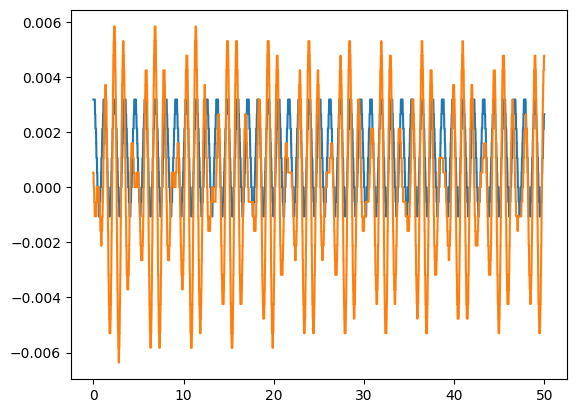

In [57]:
filename = 'dgbd_under_res.txt'

t, a, b = np.genfromtxt(filename, delimiter='\t', usecols=[1,2, 3], unpack=True)

l = 125e-3
N = 236
a *= l / N
b *= l / N
plt.plot(t, a)
plt.plot(t, b)

dgbd_res.txt omega1 = 6.906+/-0.004 rad/s
dgbd_res.txt omega = 6.9811+/-0.0014 rad/s, A = 0.1074+/-0.0005 mm/s


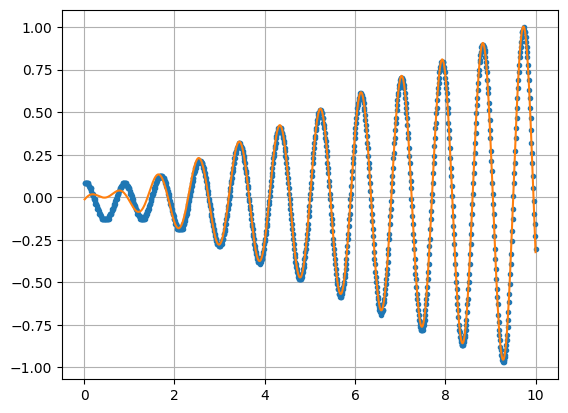

In [53]:
filename = 'dgbd_res.txt'

t, a, b = np.genfromtxt(filename, delimiter='\t', usecols=[1,2, 3], unpack=True)
a -= a.mean()
a /= np.max(a)
b -= b.mean()
b /= np.max(b)

om1  = get_freq1(t, a)
print(f'{filename} omega1 = {om1} rad/s')

om, A = get_freq3(t, b)
print(f'{filename} omega = {om} rad/s, A = {A} mm/s')

plt.grid()
plt.show()